# Network Analysis

<img src="https://researchmethods117203719.files.wordpress.com/2018/04/socialnetwork.jpg" />

Network analysis is an unsupervised analysis technique that find relationships (edges) between different entities (nodes). The analysis is based on <b>Graph Theory</b> concepts

In [1]:
library(igraph)
library(dplyr)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
### dataset
df <- read.csv(file="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
head(df)

X2B X410 AER X2965 KZN X2990 X X0 CR2
1 2B  410  ASF 2966  KZN 2990    0  CR2
2 2B  410  ASF 2966  MRV 2962    0  CR2
3 2B  410  CEK 2968  KZN 2990    0  CR2
4 2B  410  CEK 2968  OVB 4078    0  CR2
5 2B  410  DME 4029  KZN 2990    0  CR2
6 2B  410  DME 4029  NBC 6969    0  CR2

In [3]:
df

X2B X410  AER X2965 KZN X2990 X X0 CR2
1     2B  410   ASF 2966  KZN 2990    0  CR2
2     2B  410   ASF 2966  MRV 2962    0  CR2
3     2B  410   CEK 2968  KZN 2990    0  CR2
4     2B  410   CEK 2968  OVB 4078    0  CR2
5     2B  410   DME 4029  KZN 2990    0  CR2
6     2B  410   DME 4029  NBC 6969    0  CR2
7     2B  410   DME 4029  TGK \\N     0  CR2
8     2B  410   DME 4029  UUA 6160    0  CR2
9     2B  410   EGO 6156  KGD 2952    0  CR2
10    2B  410   EGO 6156  KZN 2990    0  CR2
11    2B  410   GYD 2922  NBC 6969    0  CR2
12    2B  410   KGD 2952  EGO 6156    0  CR2
13    2B  410   KZN 2990  AER 2965    0  CR2
14    2B  410   KZN 2990  ASF 2966    0  CR2
15    2B  410   KZN 2990  CEK 2968    0  CR2
16    2B  410   KZN 2990  DME 4029    0  CR2
17    2B  410   KZN 2990  EGO 6156    0  CR2
18    2B  410   KZN 2990  LED 2948    0  CR2
19    2B  410   KZN 2990  SVX 2975    0  CR2
20    2B  410   LED 2948  KZN 2990    0  CR2
21    2B  410   LED 2948  NBC 6969    0  CR2
22    2B  410   LED 2948  UUA 6160    0  CR2
23    2B  410   MRV 2962  ASF 2966    0  CR2
24    2B  410   NBC 6969  DME 4029    0  CR2
25    2B  410   NBC 6969  GYD 2922    0  CR2
26    2B  410   NBC 6969  LED 2948    0  CR2
27    2B  410   NBC 6969  SVX 2975    0  CR2
28    2B  410   NJC 2972  SVX 2975    0  CR2
29    2B  410   NJC 2972  UUA 6160    0  CR2
30    2B  410   NUX 4364  SVX 2975    0  CR2
⋮     ⋮   ⋮     ⋮   ⋮     ⋮   ⋮     ⋮ ⋮  ⋮  
67633 ZL  4178  SYD 3361  ABX 3333    0  SF3
67634 ZL  4178  SYD 3361  ARM 4062    0  SF3
67635 ZL  4178  SYD 3361  BHQ 6241    0  SF3
67636 ZL  4178  SYD 3361  BHS 6249    0  SF3
67637 ZL  4178  SYD 3361  BNK 4291    0  SF3
67638 ZL  4178  SYD 3361  DBO 3358    0  SF3
67639 ZL  4178  SYD 3361  GFF 6271    0  SF3
67640 ZL  4178  SYD 3361  LSY 6287    0  SF3
67641 ZL  4178  SYD 3361  MIM 6294    0  SF3
67642 ZL  4178  SYD 3361  MQL 6298    0  SF3
67643 ZL  4178  SYD 3361  MYA 6302    0  SF3
67644 ZL  4178  SYD 3361  NRA 6307    0  SF3
67645 ZL  4178  SYD 3361  NTL 4320    0  SF3
67646 ZL  4178  SYD 3361  OAG 6793    0  SF3
67647 ZL  4178  SYD 3361  PKE 6317    0  SF3
67648 ZL  4178  SYD 3361  TRO 6794    0  SF3
67649 ZL  4178  SYD 3361  WGA 3363    0  SF3
67650 ZL  4178  TRO 6794  GFN 6792    0  SF3
67651 ZL  4178  TRO 6794  SYD 3361    0  SF3
67652 ZL  4178  TSV 3330  ISA 3324    0  SF3
67653 ZL  4178  TSV 3330  WIN 6337    0  SF3
67654 ZL  4178  WGA 3363  MEL 3339    0  SF3
67655 ZL  4178  WGA 3363  SYD 3361    0  SF3
67656 ZL  4178  WIN 6337  LRE 6289    0  SF3
67657 ZL  4178  WIN 6337  TSV 3330    0  SF3
67658 ZL  4178  WYA 6334  ADL 3341    0  SF3
67659 ZM  19016 DME 4029  FRU 2912    0  734
67660 ZM  19016 FRU 2912  DME 4029    0  734
67661 ZM  19016 FRU 2912  OSS 2913    0  734
67662 ZM  19016 OSS 2913  FRU 2912    0  734

In [4]:
### companies flight counts
df %>% group_by(X2B) %>% tally() %>% arrange(desc(n)) %>% head(20)

X2B n   
1  FR  2484
2  AA  2354
3  UA  2180
4  DL  1981
5  US  1960
6  CZ  1454
7  MU  1263
8  CA  1260
9  WN  1146
10 U2  1130
11 AF  1071
12 LH   923
13 AZ   877
14 IB   831
15 KL   830
16 ZH   815
17 AB   798
18 FL   726
19 AC   705
20 TK   658

In [5]:
#################################################
### selecting companies
### Small company (2L == Helvetic Airways)
#################################################
df %>% filter(X2B=="FR") %>% tally()

n   
1 2484

In [6]:
df2 <- df %>% filter(X2B=="FR") %>% 
  group_by(AER,KZN) %>% summarise(cnt=n())
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

head(df2)

AER KZN cnt
1 AAR AGP 1  
2 AAR PMI 1  
3 AAR STN 1  
4 ACE BCN 1  
5 ACE BGY 1  
6 ACE BHX 1

In [7]:
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))
flt

[1] "AAR" "ACE" "AGA" "AGP" "AHO" "ALC" "AOI" "ATH" "BCN" "BDS" "BES" "BGY"
 [13] "BHX" "BIQ" "BLL" "BLQ" "BOD" "BOH" "BRE" "BRI" "BRQ" "BRS" "BRU" "BSL"
 [25] "BTS" "BUD" "BVA" "BVE" "BZG" "BZR" "CAG" "CCF" "CFE" "CFU" "CGN" "CHQ"
 [37] "CIA" "CIY" "CRL" "CTA" "CUF" "DLE" "DNR" "DTM" "DUB" "EBU" "EDI" "EFL"
 [49] "EGC" "EIN" "EMA" "ESU" "FAO" "FCO" "FEZ" "FKB" "FMM" "FMO" "FNI" "FSC"
 [61] "FUE" "GDN" "GOA" "GPA" "GRO" "GRQ" "GSE" "HAU" "HHN" "IBZ" "KGS" "KIR"
 [73] "KRK" "KTW" "KUN" "LBA" "LBC" "LDE" "LDY" "LEI" "LEJ" "LGW" "LIG" "LIL"
 [85] "LIS" "LNZ" "LPA" "LPL" "LPP" "LRH" "LTN" "LUZ" "MAD" "MAH" "MAN" "MJV"
 [97] "MLA" "MMX" "MPL" "MRS" "MST" "NCE" "NCL" "NDR" "NOC" "NRN" "NTE" "NUE"
[109] "NYO" "OPO" "ORK" "OSI" "OSR" "OTP" "OUD" "PDV" "PEG" "PFO" "PGF" "PIK"
[121] "PIS" "PMF" "PMI" "PMO" "POZ" "PRG" "PSA" "PSR" "PUY" "RAK" "RBA" "RDZ"
[133] "REU" "RHO" "RIX" "RJK" "RYG" "RZE" "SCQ" "SDR" "SFT" "SKG" "SNN" "STN"
[145] "SUF" "SVQ" "SXB" "SXF" "SZG" "SZZ" "TFN" "TFS" "TGD" "TLL" "TLN" "TMP"
[157] "TNG" "TPS" "TRF" "TRN" "TRS" "TSF" "TUF" "VLC" "VLL" "VNO" "VOL" "VST"
[169] "VXO" "WMI" "WRO" "XCR" "XRY" "ZAD" "ZAZ" "ZTH"

In [8]:
mtx <- Matrix::Matrix(NA,nrow=length(flt),ncol =length(flt))

### iterate through the matrix
for(i in 1:length(flt)) {
  #res <- NULL
  for(j in 1:length(flt)) {
    if(is.na(as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"]))==F) {
      mtx[i,j] <- as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"])
    }
  }
}


In [9]:
links <- as.matrix(mtx)


In [10]:
mynet <- graph.adjacency(links, mode="directed",weighted=NULL)


In [11]:
### network size by edges
E(mynet)

+ 2484/2484 edges from ca3afb9:
  [1] 1->  4 1->123 1->144 2->  9 2-> 12 2-> 13 2-> 16 2-> 18 2-> 22 2-> 27
 [11] 2-> 39 2-> 45 2-> 47 2-> 50 2-> 51 2-> 56 2-> 69 2-> 76 2-> 88 2-> 91
 [21] 2-> 93 2-> 95 2->105 2->106 2->111 2->120 2->139 2->140 2->143 2->144
 [31] 2->146 2->175 3-> 39 3->100 4->  1 4->  9 4-> 12 4-> 13 4-> 15 4-> 16
 [41] 4-> 18 4-> 19 4-> 22 4-> 23 4-> 25 4-> 27 4-> 35 4-> 37 4-> 39 4-> 44
 [51] 4-> 45 4-> 47 4-> 50 4-> 51 4-> 56 4-> 57 4-> 58 4-> 67 4-> 68 4-> 69
 [61] 4-> 70 4-> 73 4-> 76 4-> 88 4-> 95 4-> 98 4->100 4->105 4->106 4->108
 [71] 4->109 4->111 4->120 4->123 4->137 4->139 4->140 4->143 4->144 4->156
 [81] 4->159 4->162 4->168 4->171 5->  7 5-> 12 5-> 15 5-> 16 5-> 25 5-> 27
 [91] 5-> 37 5-> 39 5-> 41 5-> 44 5-> 45 5-> 50 5-> 57 5-> 65 5-> 67 5-> 69
+ ... omitted several edges

In [12]:
### network size by vertices (nodes)
V(mynet)

+ 176/176 vertices, from ca3afb9:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176

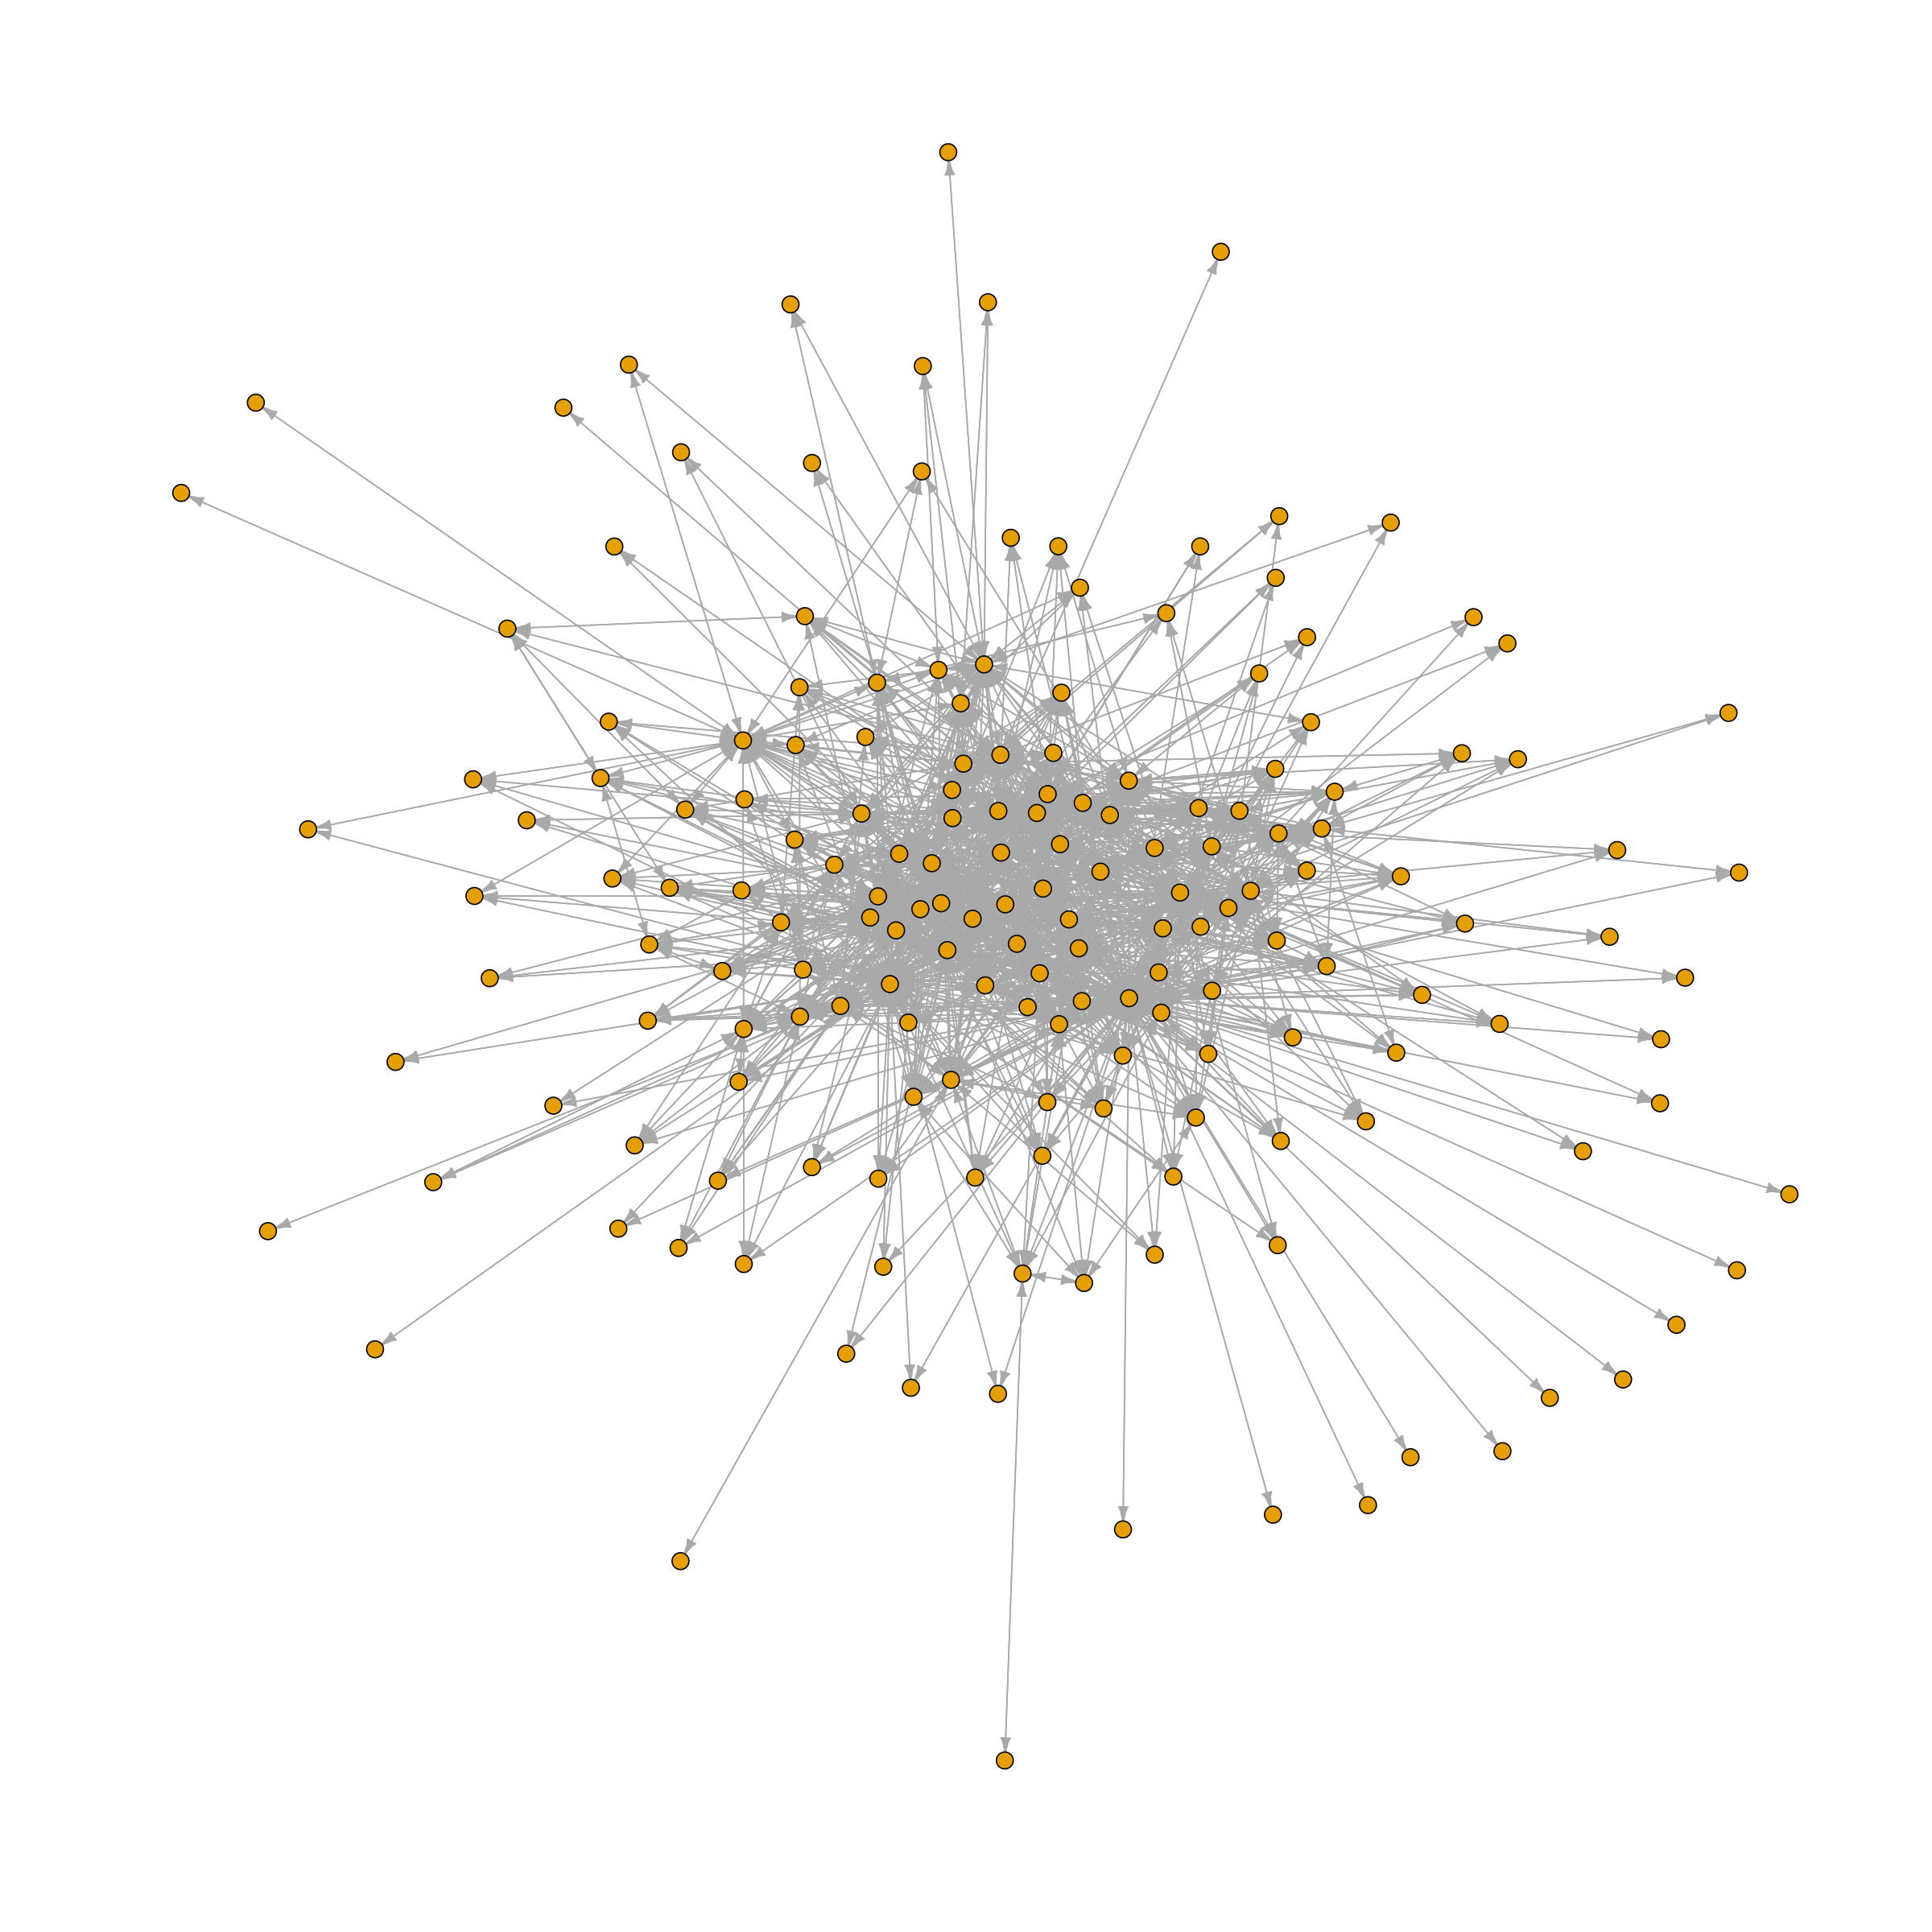

In [33]:
options(repr.plot.width = 20, repr.plot.height =20)

plot(mynet, edge.arrow.size=0.2, vertex.label=NA, vertex.size=2)

### Measures

In [20]:
mean_distance(mynet, directed=F)

[1] 2.16961

In [21]:
diameter(mynet, directed=F,weights=NA)

[1] 4

In [22]:
centr_degree(mynet,mode="in",normalized=T)

$res
  [1]   3  29   2  50  26  42   5   6  39  11   1  63  21   4  18  32   8  16
 [19]  25  20   1  28   9   2  15  14  46   1   3   9  21  10   1  13   5  26
 [37]  45   7  75   8   3   3   2   8  76   2  30   1   5  32  37   1  29   5
 [55]  13  15  14   2   4   1  20  11   5   1  44   2  13   6  43  24   7   5
 [73]  28   5  19  22   3   2   5   5   1   5   5   2  11   1  26  33   3   5
 [91]  18   1  30   3  36  10  28   2   3  34   8   2   2   5  12  38   3   3
[109]  24  36  14   1   1   2   4   2   4  10   2  21   2   4  49  10   8   2
[127]  43   8   5  18   6   3  13  10  10   1  35   7  13  16   2  16  18 124
[145]   9  22   2   6   1   3   2  35   2   6   1   8   4  27   6   8   7  29
[163]   5  26   1  12   2   3   1  26  18   2   3  14   5   1

$centralization
[1] 0.6279221

$theoretical_max
[1] 30800

In [23]:
edge_density(mynet,loops=F)

[1] 0.08064935

In [24]:
degree(mynet)

[1]   6  58   4 100  52  84  10  12  78  22   2 126  42   8  36  64  16  32
 [19]  50  40   2  56  18   4  30  28  92   2   6  18  42  20   2  26  10  52
 [37]  90  14 150  16   6   6   4  16 152   4  60   2  10  64  74   2  58  10
 [55]  26  30  28   4   8   2  40  22  10   2  88   4  26  12  86  48  14  10
 [73]  56  10  38  44   6   4  10  10   2  10  10   4  22   2  52  66   6  10
 [91]  36   2  60   6  72  20  56   4   6  68  16   4   4  10  24  76   6   6
[109]  48  72  28   2   2   4   8   4   8  20   4  42   4   8  98  20  16   4
[127]  86  16  10  36  12   6  26  20  20   2  70  14  26  32   4  32  36 248
[145]  18  44   4  12   2   6   4  70   4  12   2  16   8  54  12  16  14  58
[163]  10  52   2  24   4   6   2  52  36   4   6  28  10   2

In [25]:
mean(degree(mynet))

[1] 28.22727

### Clusters

In [26]:
cliques(mynet)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[[1]]
+ 1/176 vertex, from ca3afb9:
[1] 144

[[2]]
+ 1/176 vertex, from ca3afb9:
[1] 39

[[3]]
+ 1/176 vertex, from ca3afb9:
[1] 27

[[4]]
+ 1/176 vertex, from ca3afb9:
[1] 51

[[5]]
+ 1/176 vertex, from ca3afb9:
[1] 88

[[6]]
+ 1/176 vertex, from ca3afb9:
[1] 22

[[7]]
+ 1/176 vertex, from ca3afb9:
[1] 76

[[8]]
+ 1/176 vertex, from ca3afb9:
[1] 120

[[9]]
+ 1/176 vertex, from ca3afb9:
[1] 13

[[10]]
+ 1/176 vertex, from ca3afb9:
[1] 91

[[11]]
+ 1/176 vertex, from ca3afb9:
[1] 18

[[12]]
+ 1/176 vertex, from ca3afb9:
[1] 23

[[13]]
+ 1/176 vertex, from ca3afb9:
[1] 101

[[14]]
+ 1/176 vertex, from ca3afb9:
[1] 40

[[15]]
+ 1/176 vertex, from ca3afb9:
[1] 82

[[16]]
+ 1/176 vertex, from ca3afb9:
[1] 35

[[17]]
+ 1/176 vertex, from ca3afb9:
[1] 107

[[18]]
+ 1/176 vertex, from ca3afb9:
[1] 89

[[19]]
+ 1/176 vertex, from ca3afb9:
[1] 77

[[20]]
+ 1/176 vertex, from ca3afb9:
[1] 42

[[21]]
+ 1/176 vertex, from ca3afb9:
[1] 41

[[22]]
+ 1/176 vertex, from ca3afb9:
[1] 172

[[23]]
+ 1/176

In [27]:
sapply(cliques(mynet), length)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2
   [73] 1 2 1 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 1 2 1 2 1 2 1 2 1
  [109] 2 2 1 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2
  [145] 1 2 1 2 2 1 2 1 2 2 2 2 1 2 1 2 2 2 1 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2
  [181] 1 2 1 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 2 2 1 2 1 2 1 2 3 2 3 3 3 2 3
  [217] 3 2 3 2 3 2 3 2 3 3 3 2 3 2 3 2 3 3 3 2 3 3 2 3 3 2 3 3 3 3 3 3 2 2 2 2
  [253] 2 2 2 2 2 1 2 3 3 3 2 3 2 3 3 3 2 3 3 2 3 3 2 3 2 3 3 3 3 3 2 2 2 2 2 1
  [289] 2 3 3 2 3 2 3 3 3 2 3 2 3 3 3 2 3 3 2 3 2 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1
  [325] 2 3 3 3 2 3 3 2 3 2 3 3 3 3 2 2 2 2 2 1 2 3 3 3 2 3 2 3 3 3 2 3 3 2 3 2
  [361] 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 2 3 2 3 3 3 2 2 3 3 3 3 3 2 2 2 2 2 1 2 3
  [397] 3 3 3 2 3 2 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 2 2
  [433] 2 2 2 2 2 2 2 2 2 2 1 2 3 2 3 2 3 3 3 2 3 3 2 3 2 3 3 3 2 2 2 1 2 3 3 3
  [469] 3 3 3 3 3 2 2 2 2 2 2 2 2 1 2 3 2 2 2 2 1 2 3 3 2 2 2 1 2 3 3 2 3 2 2 2
  [505] 1 2 3 2 3 2 1 2 3 3 3 3 2 2 2 2 1 2 3 3 2 2 2 1 2 2 1 2 3 2 2 1 2 3 3 3
  [541] 3 3 3 2 2 2 2 2 2 2 1 2 3 3 2 2 1 2 3 2 2 1 2 3 2 3 3 3 3 3 2 2 2 2 2 2
  [577] 1 2 3 2 2 1 2 3 2 2 1 2 3 3 3 2 2 2 1 2 3 2 3 2 2 1 2 3 3 2 2 1 2 3 3 2
  [613] 2 1 2 3 2 1 2 3 2 1 2 3 2 2 2 1 2 3 2 1 2 3 2 3 3 3 2 2 2 1 2 3 3 2 2 1
  [649] 2 3 2 1 2 3 3 2 3 3 2 2 1 2 3 2 1 2 2 3 4 3 2 3 4 3 2 3 4 3 4 3 2 3 3 4
  [685] 3 2 3 3 4 3 2 3 3 4 3 2 3 3 4 3 2 3 4 3 4 3 3 4 3 2 2 3 2 2 3 2 3 2 3 2
  [721] 3 2 3 2 2 3 2 1 2 3 2 3 2 3 2 3 4 3 2 3 4 4 3 3 2 3 4 4 3 3 2 3 4 4 3 4
  [757] 4 3 3 2 3 4 4 3 4 4 3 3 2 3 3 4 4 3 4 4 3 3 2 2 3 3 2 3 3 2 2 1 2 3 4 3
  [793] 2 3 4 3 2 3 4 3 2 3 4 3 4 3 2 3 4 3 3 4 3 3 2 3 4 3 3 4 3 2 3 4 3 3 4 3
  [829] 4 3 2 3 4 3 3 4 3 3 2 3 2 3 2 2 3 3 2 3 2 2 1 2 3 2 3 3 2 2 1 2 3 4 3 4
  [865] 3 2 3 3 4 3 2 3 2 2 3 2 1 2 3 4 4 3 3 2 3 4 4 4 3 3 3 2 3 4 4 4 3 3 3 2
  [901] 3 3 3 2 3 3 2 3 3 3 3 3 2 2 2 2 2 1 2 3 4 3 3 2 3 3 2 3 4 3 3 2 3 3 2 3
  [937] 2 2 1 2 3 4 4 3 4 4 4 3 3 3 2 3 4 4 3 4 4 4 3 3 3 2 3 3 2 3 3 3 3 3 3 2
  [973] 2 2 2 2 2 1 2 3 4 4 4 3 3 3 2 3 4 4 4 3 3 3 2 3 3 2 3 3 3 3 2 2 2 2 1 2
 [1009] 3 4 3 2 3 3 3 2 2 2 1 2 3 3 2 3 4 4 3 3 2 3 3 2 2 1 2 3 4 3 2 3 4 3 2 3
 [1045] 4 3 2 3 4 3 2 2 3 2 3 2 1 2 3 4 4 3 3 2 3 2 3 3 2 2 1 2 3 2 3 4 3 4 4 3
 [1081] 3 3 2 3 2 3 3 2 2 2 2 2 1 2 3 4 3 4 5 4 3 4 3 2 3 4 3 2 3 4 5 4 3 4 3 2
 [1117] 3 3 4 3 2 3 4 3 4 3 4 3 4 3 2 3 2 3 3 4 3 2 3 2 3 3 4 3 2 3 3 4 3 2 3 4
 [1153] 3 3 4 3 2 3 2 2 3 2 1 2 3 4 3 4 3 4 3 4 3 2 3 4 5 5 4 4 3 4 5 5 4 4 3 4
 [1189] 5 5 4 4 3 4 4 3 3 2 3 4 3 3 2 3 4 4 3 3 3 2 3 4 4 4 3 3 3 3 2 3 4 4 4 3
 [1225] 3 3 2 3 4 4 3 4 4 4 3 3 3 2 3 4 3 4 4 4 3 3 3 3 2 3 2 3 3 3 2 3 3 3 2 2
 [1261] 2 2 2 1 2 3 4 4 3 3 2 3 4 5 5 4 5 5 5 4 4 4 3 4 4 3 4 4 4 4 3 3 3 3 2 3
 [1297] 4 5 5 5 4 4 4 3 4 4 4 3 3 3 2 3 3 4 3 2 3 3 2 3 4 5 4 4 5 4 3 4 5 4 4 5
 [1333] 4 3 4 3 3 4 3 2 3 4 4 5 5 4 5 5 4 4 3 3 4 4 3 4 4 3 3 2 3 4 4 5 4 3 4 5
 [1369] 4 4 5 4 3 4 3 3 4 3 2 3 3 3 2 3 4 4 4 3 4 3 4 4 3 4 3 4 4 4 4 4 3 3 3 3
 [1405] 3 3 2 3 4 3 4 3 4 4 4 3 4 3 4 4 3 4 4 3 4 4 4 4 4 4 3 3 3 3 3 3 3 2 3 2
 [1441] 3 2 3 2 3 2 3 3 3 2 3 2 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2
 [1477] 2 2 2 2 2 1 2 3 4 3 4 3 4 3 4 3 2 3 4 4 3 4 5 5 4 4 3 4 4 3 3 2 3 4 5 4
 [1513] 3 4 5 4 5 4 3 4 5 4 3 4 3 4 3 2 3 4 4 4 3 3 3 2 3 4 4 4 3 3 3 2 3 4 4 3
 [1549] 4 4 4 3 3 3 2 3 4 3 4 4 4 3 3 3 2 3 2 3 3 2 3 3 3 3 2 2 2 2 1 2 3 4 5 5
 [1585] 4 4 3 4 5 5 5 4 4 4 3 4 5 5 5 4 4 4 3 4 4 3 4 4 4 4 4 3 3 3 3 3 2 3 4 4
 [1621] 5 4 3 4 4 5 4 5 4 3 4 4 5 4 3 3 4 3 4 3 2 3 4 5 5 4 5 5 4 4 3 4 5 5 4 5
 [1657] 5 4 4 3 4 5 5 4 5 5 4 4 3 4 4 3 4 4 3 3 2 3 4 4 3 4 4 4 4 3 3 3 3 2 3 4
 [1693] 4 4 3 4 4 3 4 4 4 4 4 3 3 3 3 3 2 3 4 4 4 3 4 4 3 4 4 3 4 4 4 4 4 3 3 3
 [1729] 3 3 2 3 4 4 4 3 4 4 3 4 4 4 4 4 3 3 3 3 3 2 3 3 3 2 3 3 3 2 3 3 2 3 3 2
 [1765] 3 3 3 3 3 3 3 2 2 2 2 2 2 2 1 2 3 4 5 5 4 4 3 4 5 5 4 4 3 4 5 5 4 4 3 4
 [18

In [28]:
largest_cliques(mynet)

Warning message in largest_cliques(mynet):
“At cliques.c:1087 :directionality of edges is ignored for directed graphs”


[[1]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  39  37   9 170 123 137

[[2]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  39  37   9   4 123 137

[[3]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  39  16   9 170 123 137

[[4]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  39  16   9   4 123 137

[[5]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  39  12   9 170 123 137

[[6]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  39  12   9   4 123 137

[[7]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  27  37 123 137   9 170

[[8]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  27  37 123 137   9   4

[[9]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  27  16 137 123   9 170

[[10]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  27  16 137 123   9   4

[[11]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  27  12   9 123 137 170

[[12]]
+ 8/176 vertices, from ca3afb9:
[1]  95  45  27  12   9 123 137   4

[[13]]
+ 8/176 vertices, from ca3afb9:
[1]  47  45  39   9 140   4  37 123

[[14]]
+ 8/176 vertic

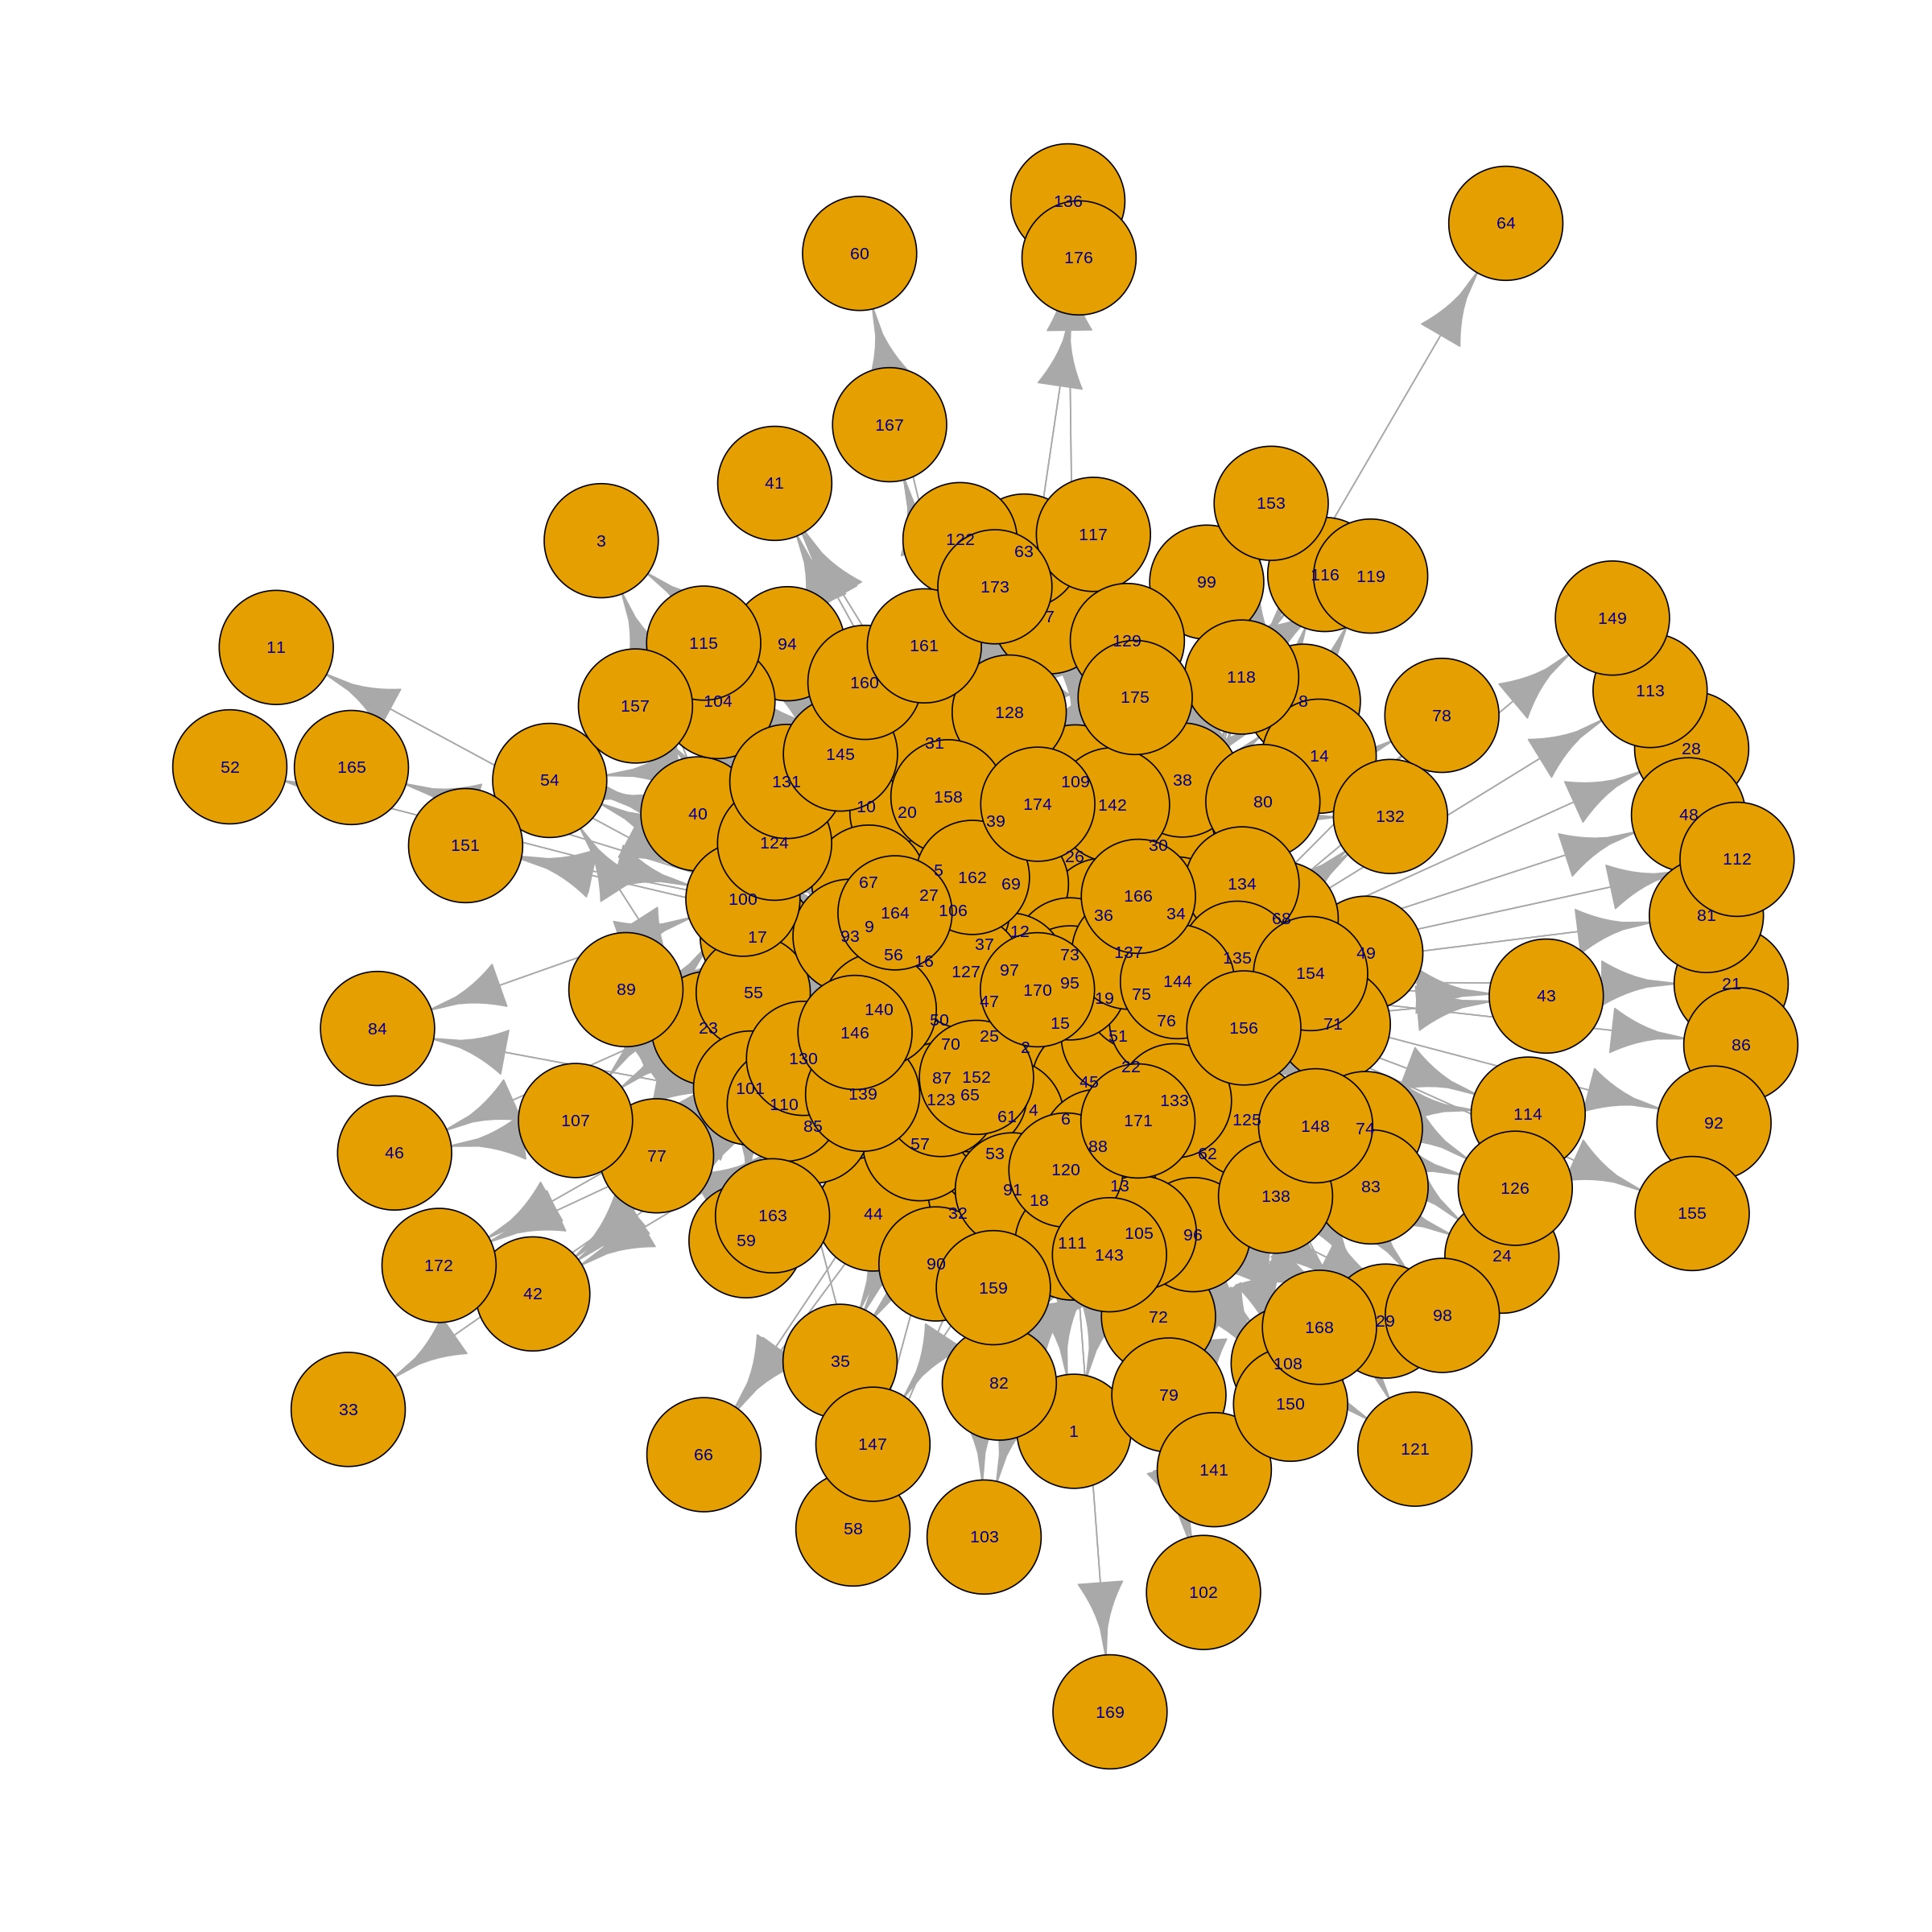

In [34]:
plot(as.directed(mynet))

### Hubs

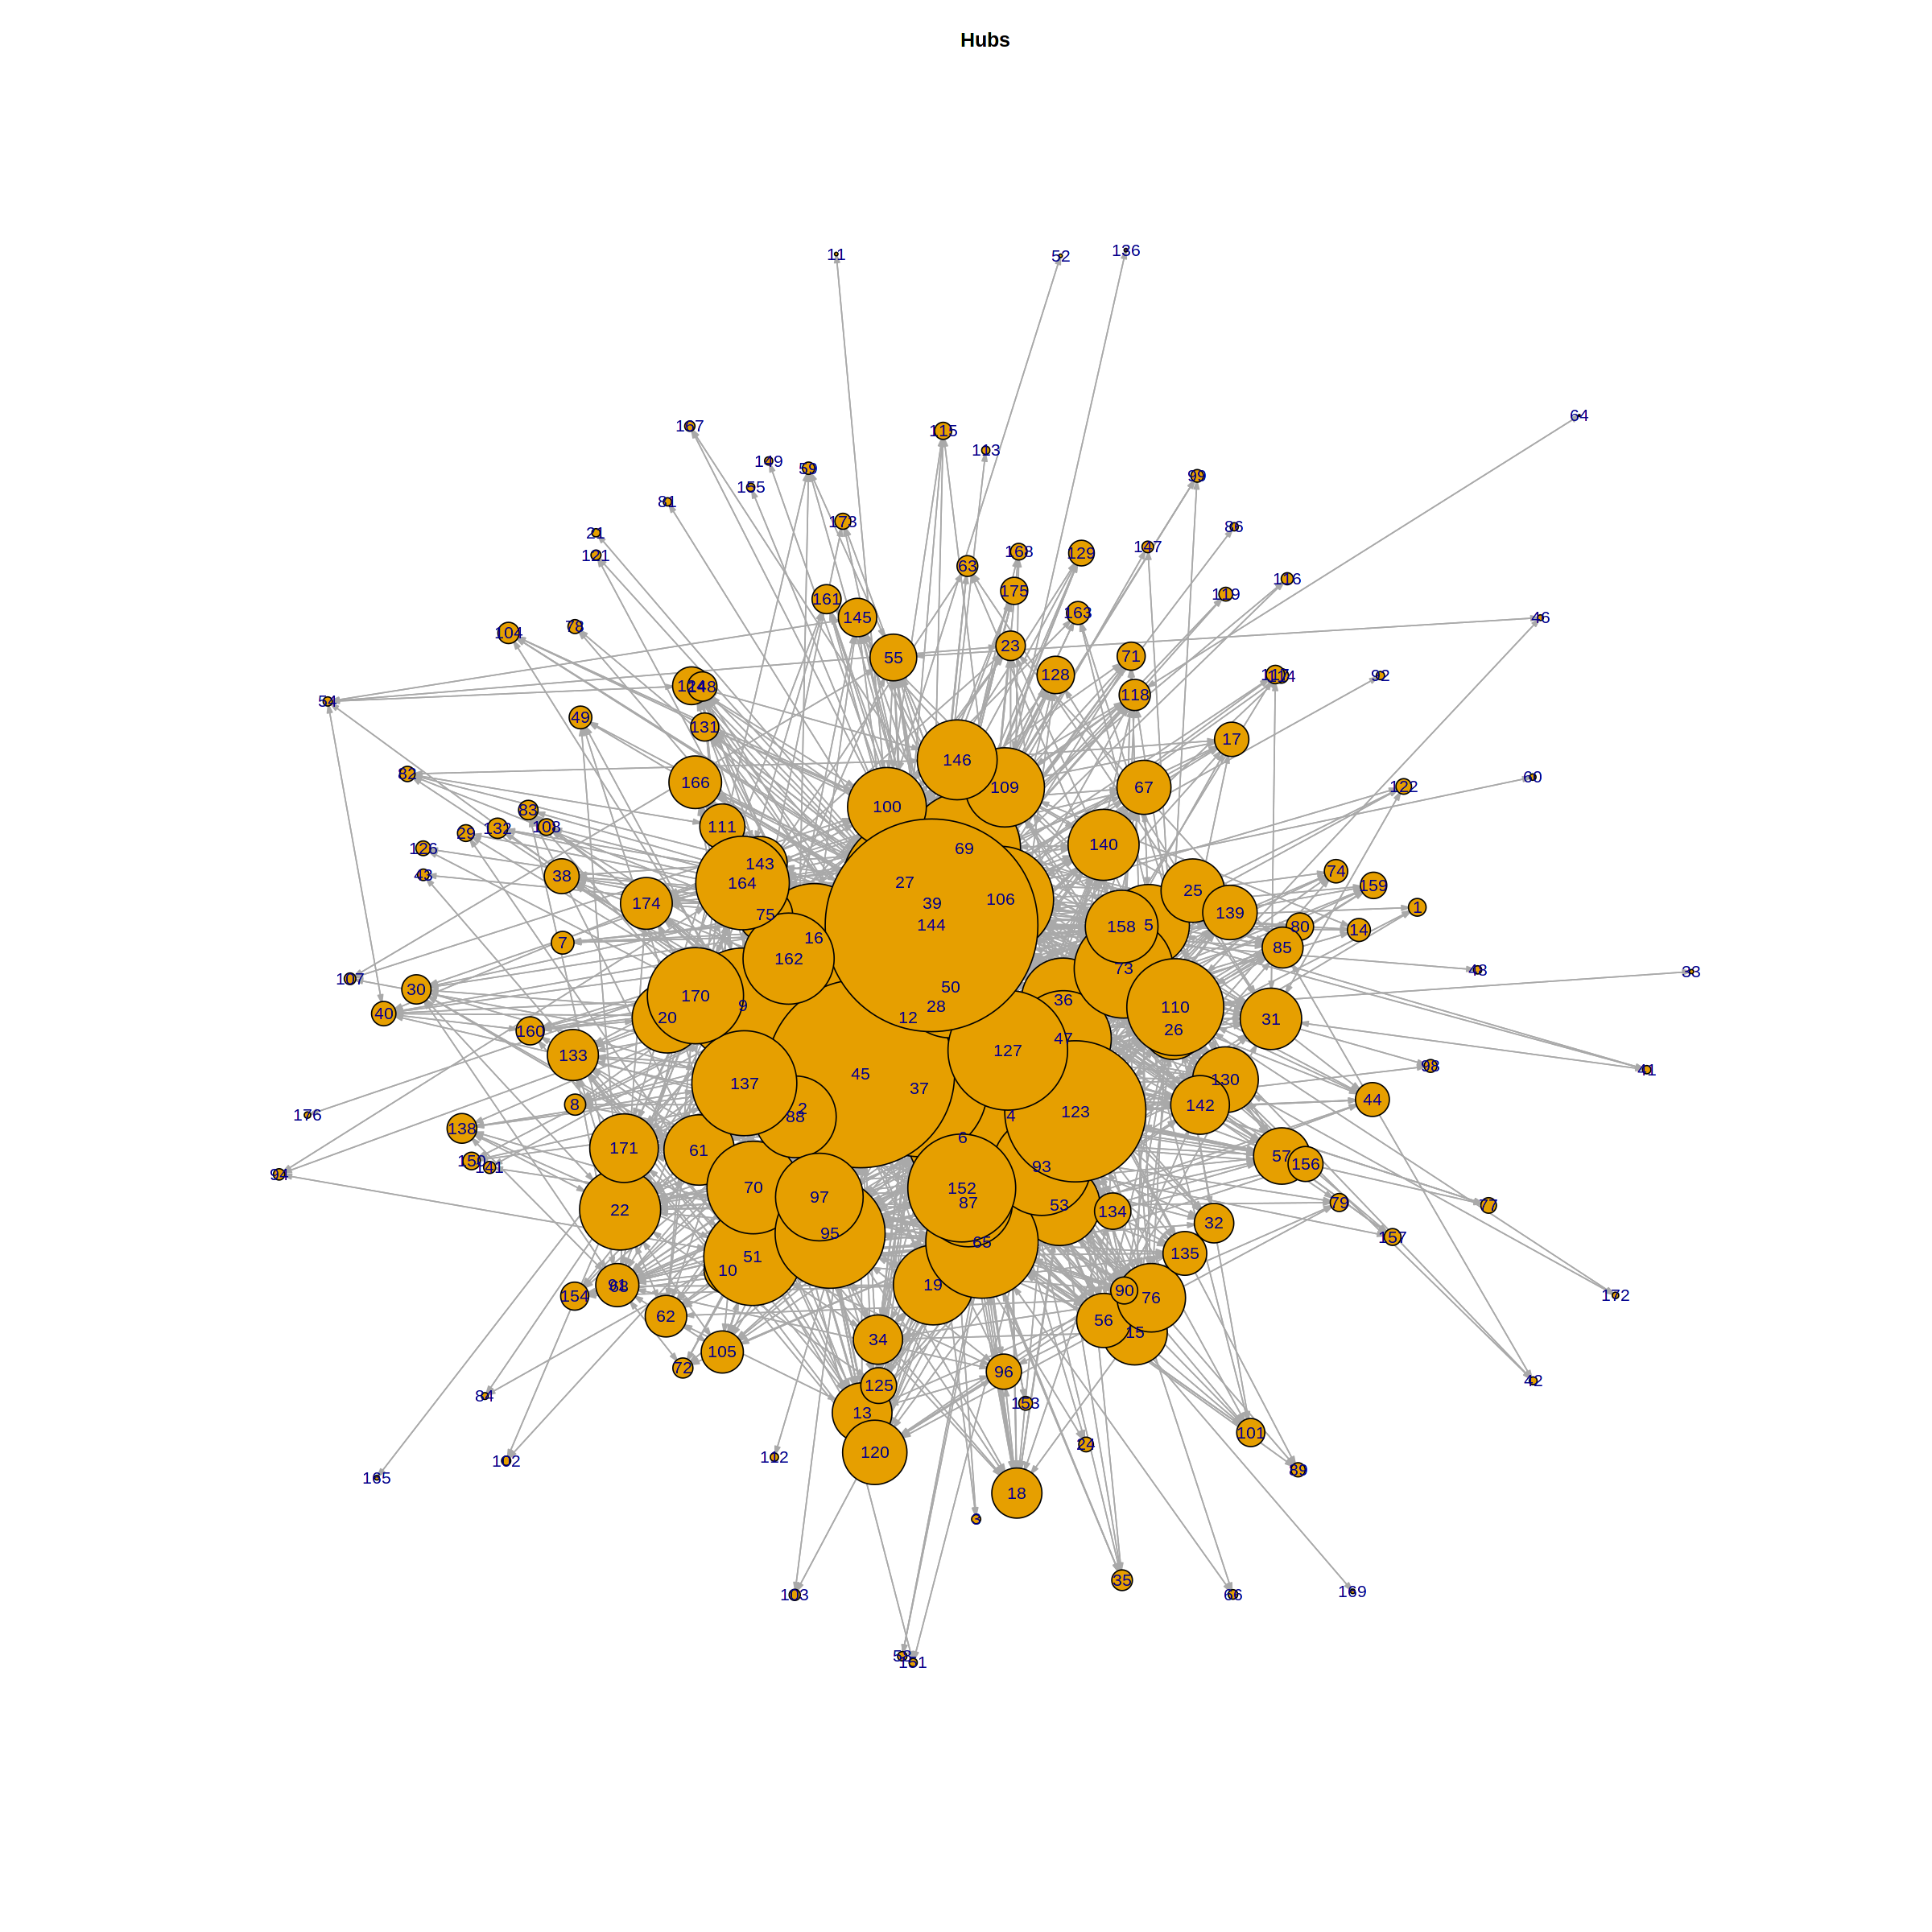

In [35]:
set.seed(11)

hs <- hub_score(mynet)$vector
plot(mynet, vertex.size=hs * 30,main="Hubs",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Authority

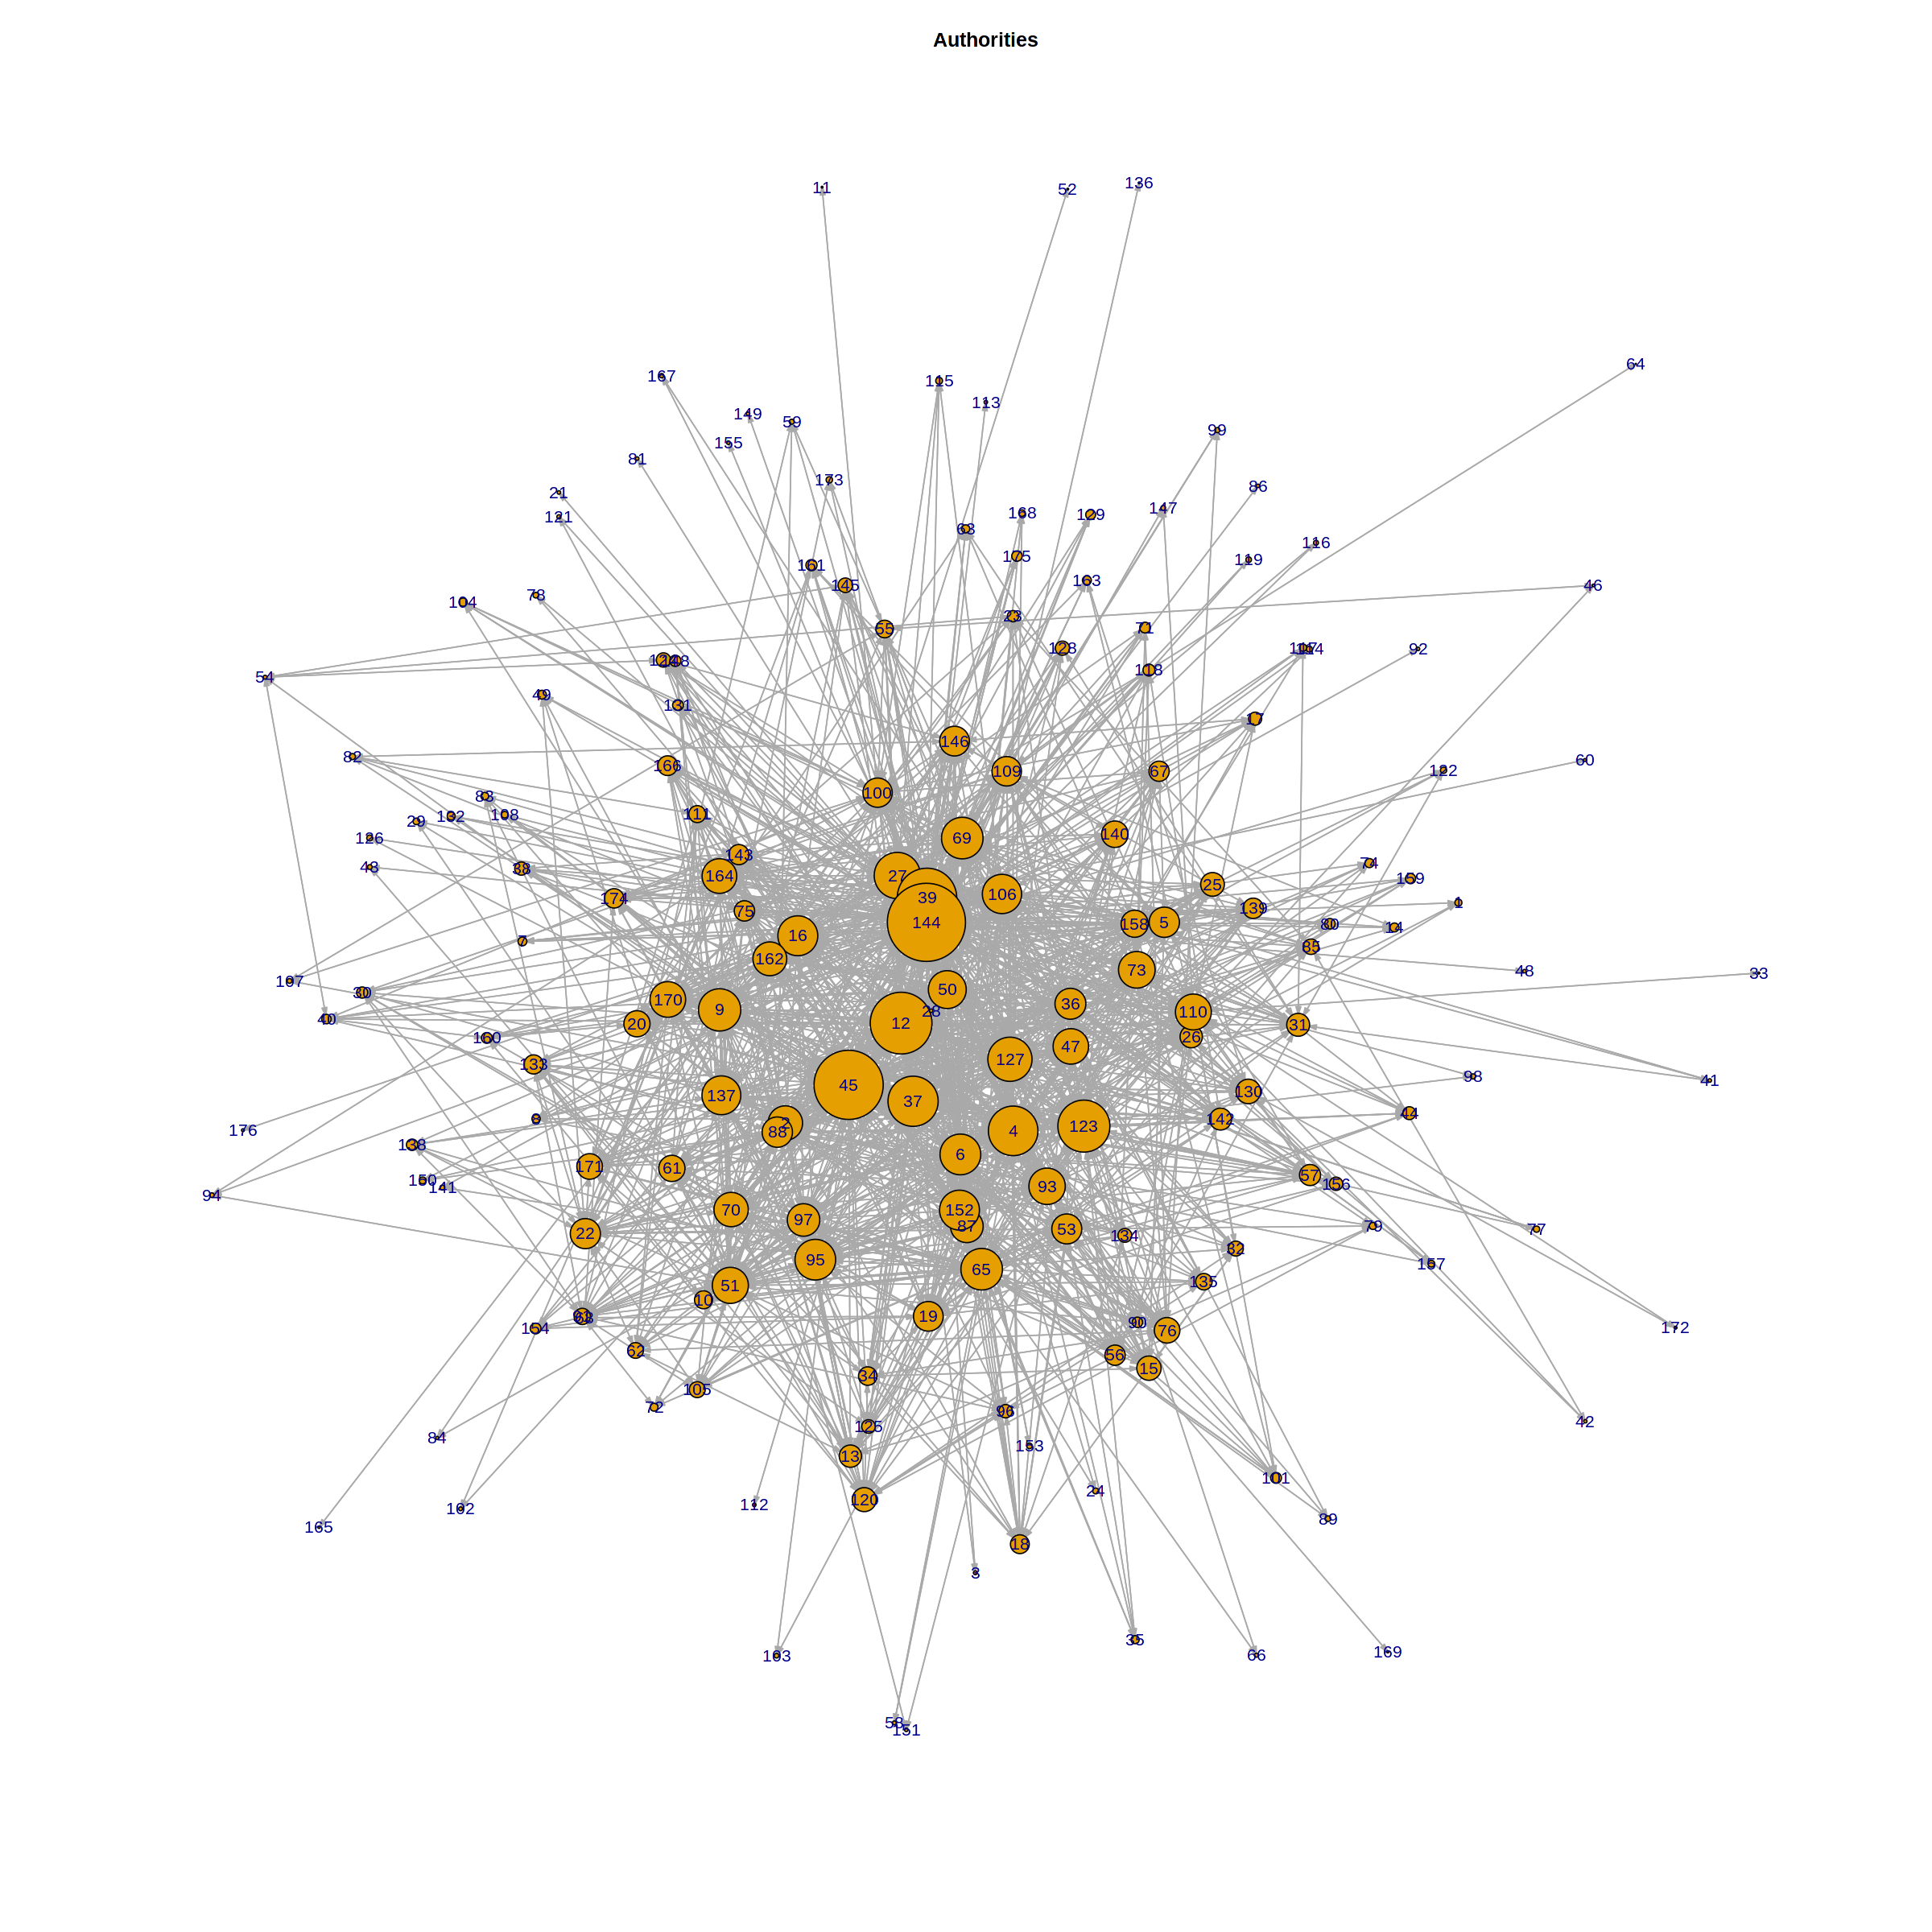

In [46]:
set.seed(11)

au <- authority_score(mynet)$vector
plot(mynet, vertex.size=au * 10,main="Authorities",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Community

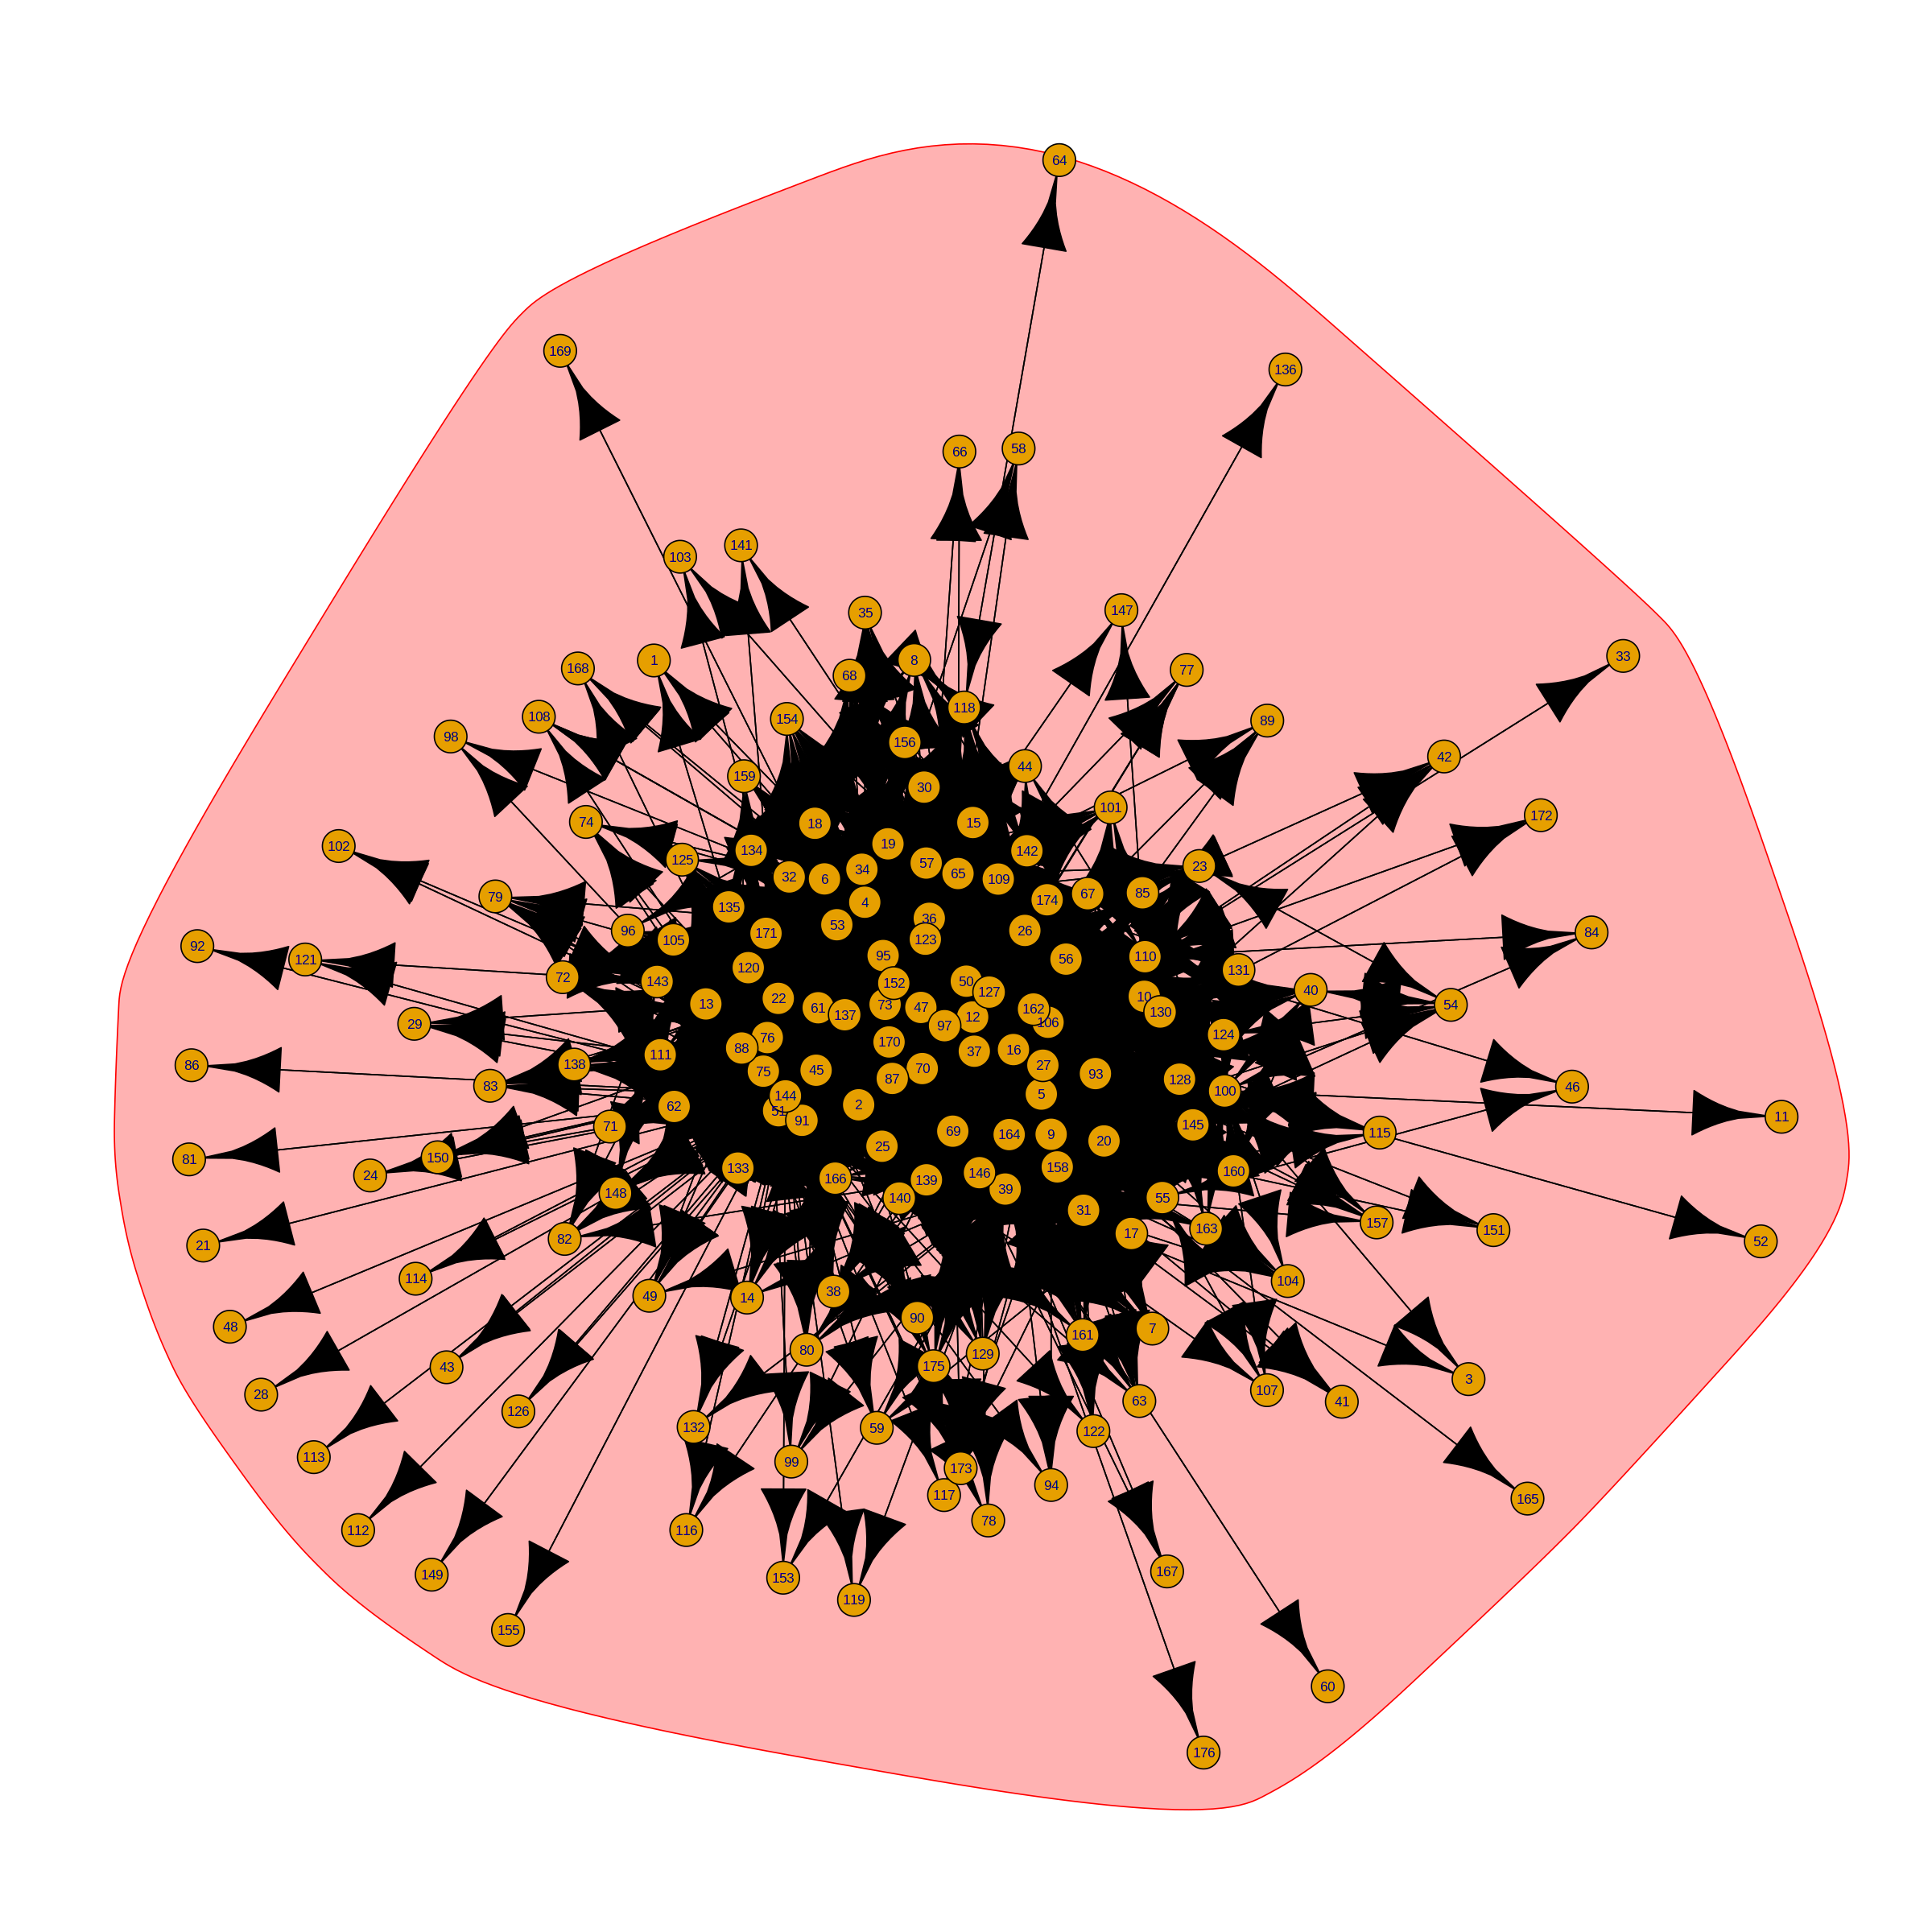

In [48]:
### community
cnet <- cluster_edge_betweenness(mynet)
plot(cnet, mynet, vertex.size=4, vertex.label.cex=0.8)

In [49]:
btwn <- cluster_edge_betweenness(mynet)
btwn

IGRAPH clustering edge betweenness, groups: 1, mod: 0
+ groups:
  $`1`
    [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
   [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
   [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
   [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
   [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
   [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
  [109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
  [127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
  [145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
  + ... omitted several groups/vertices

ERROR: Error in rect.hclust(hc, k = rect, border = colbar): k must be between 2 and 175


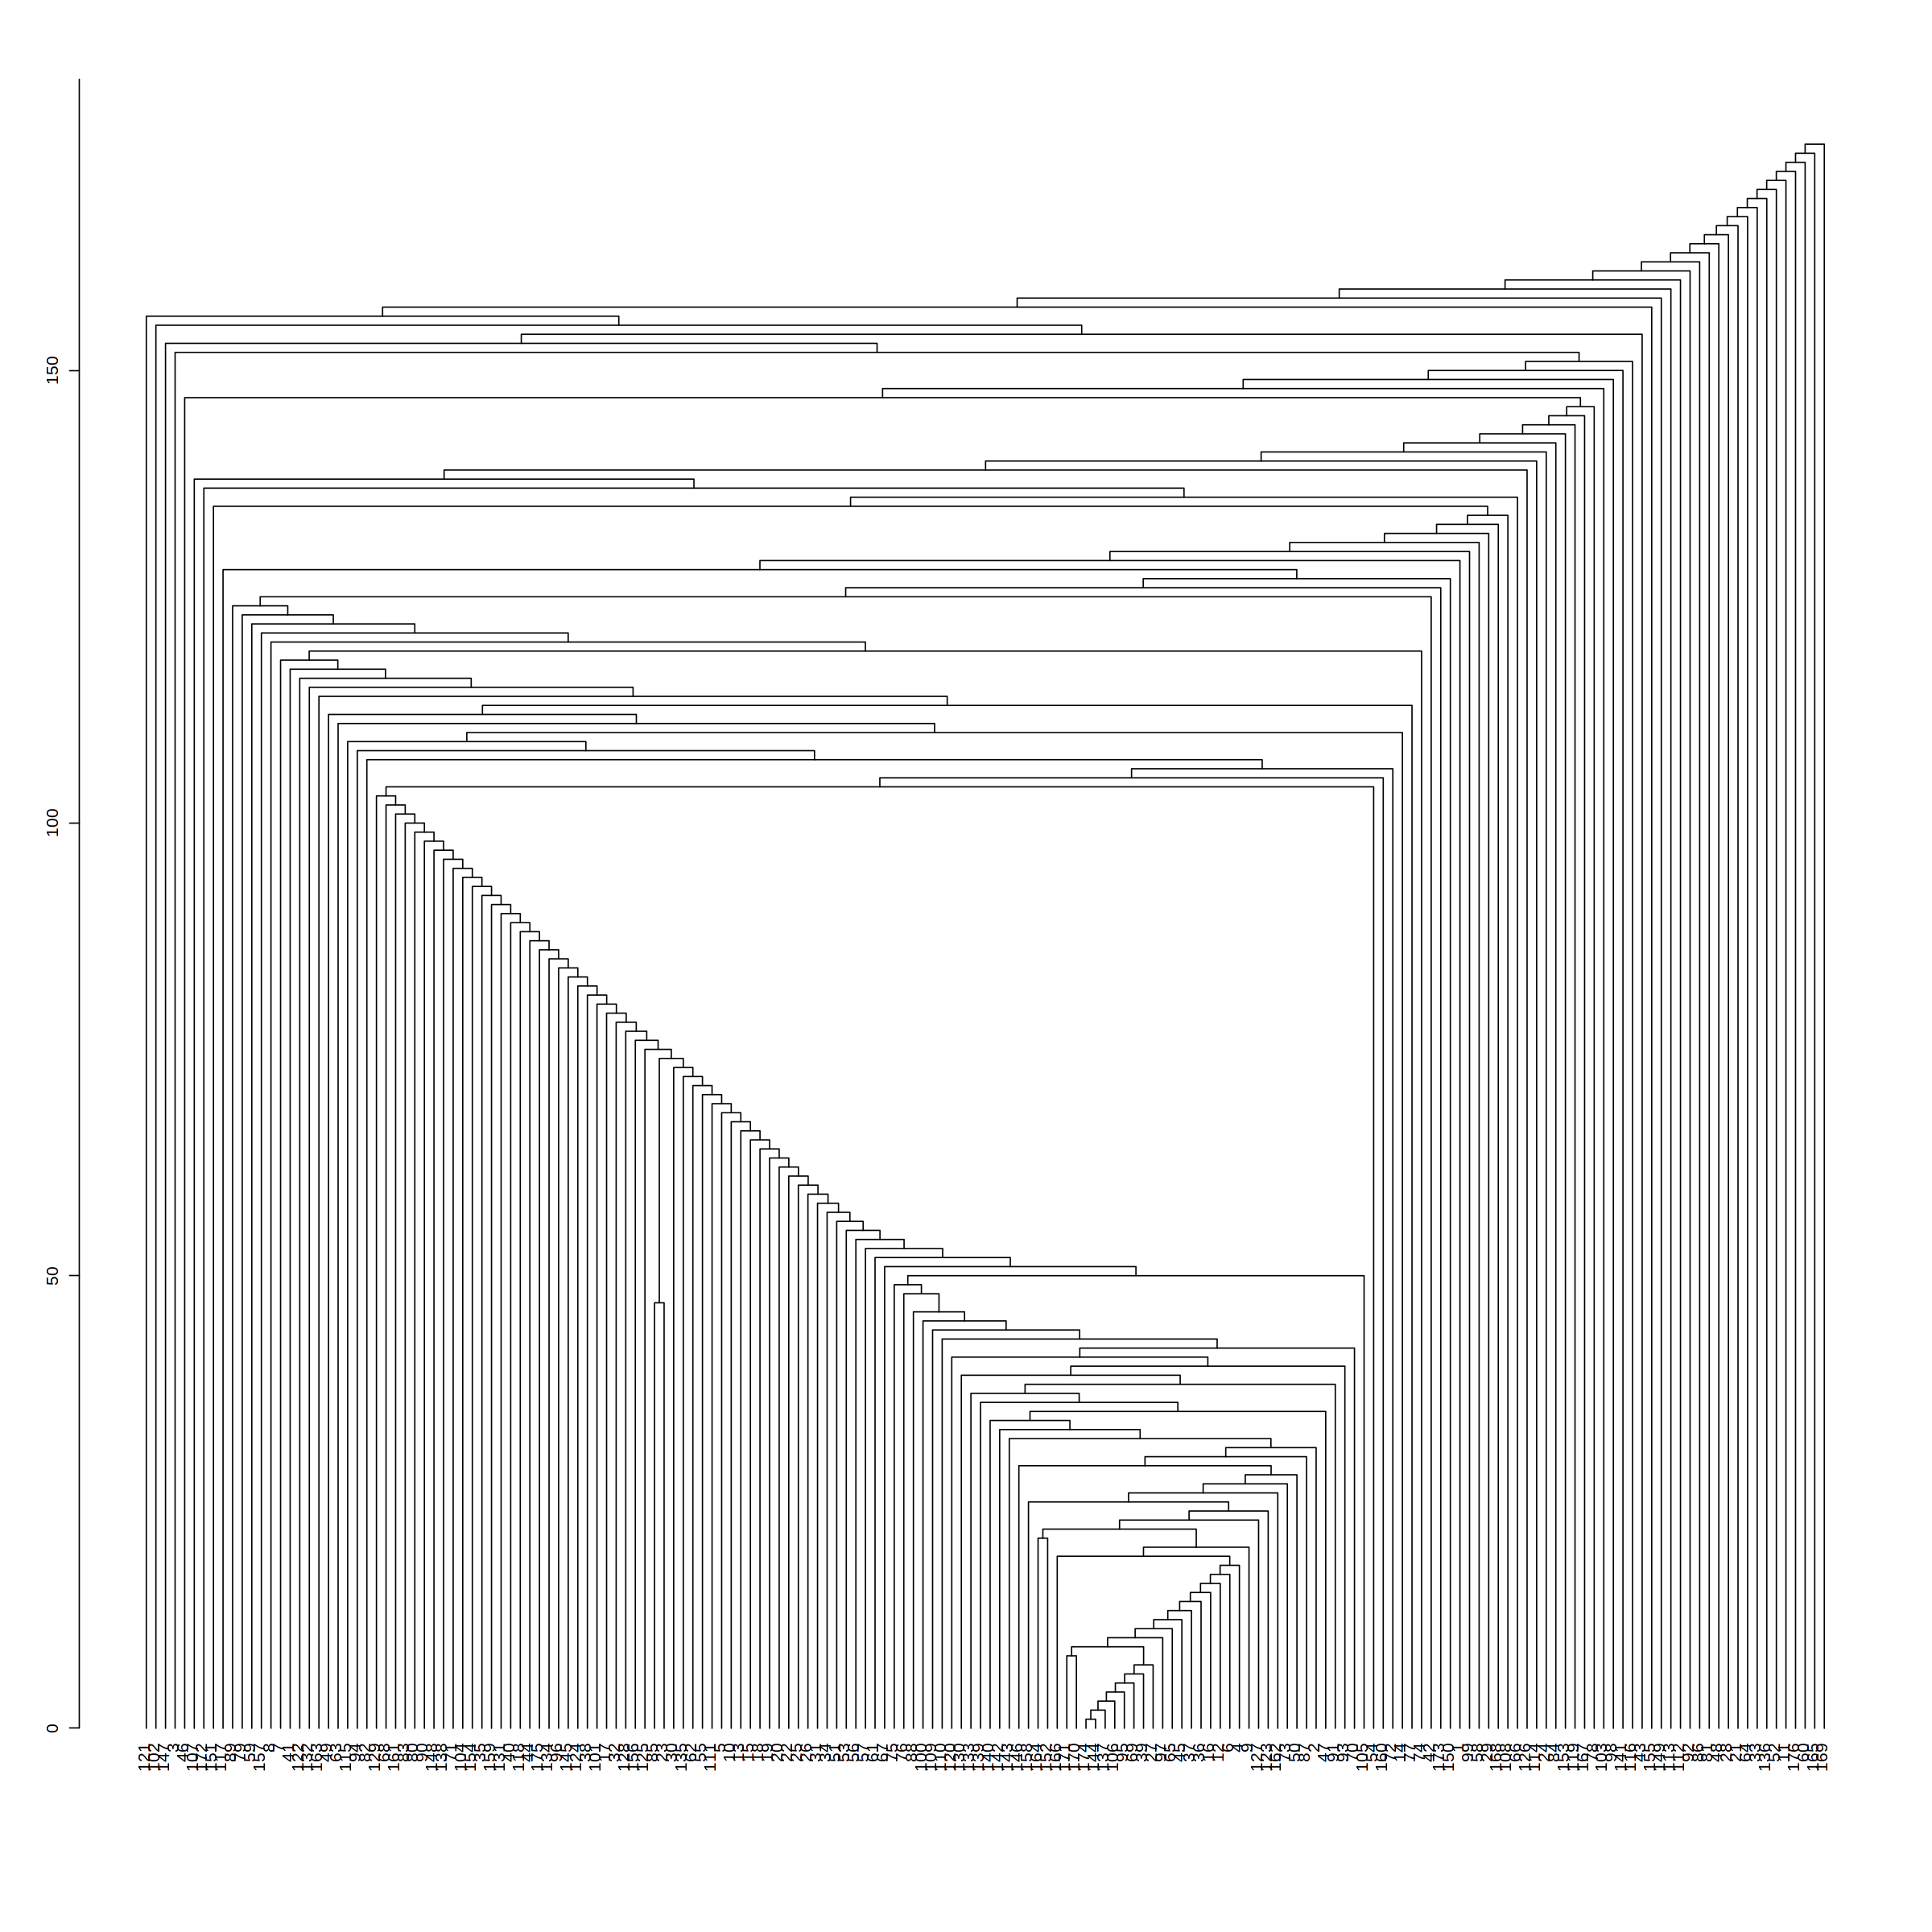

In [39]:
dendPlot(btwn, mode="hclust")

In [50]:
length(btwn)

[1] 1

In [41]:
membership(btwn)

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1